# Notebook Nb2

- In the second notebook the ROI criterium is predicted based on different features to choose more accurately our clients while making B2B contracts. Different dataframes are built to enable the best prediction for a given short time of training. 


- Feature selections, PCA, FAMD are performed. Linear Regression, Ridge Regression, Lasso, SVR, Random Forest, Gradient boosting, XGBoost etc are performed.  Expandable neuronal networkds are built and trained as  well. A model based on specific dataframe is finally selected. A discussion for future work is opened. 


- Extra functions and loops could have been added but the general spirit of this notebook was to keep the presentation of all the models as simple as possible while performing some valuable data science study.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# upload the data
df_2018 = pd.read_csv('data2018_featengv2.csv')

print("--- Nom des features ---", "\n\n", df_2018.columns.values.tolist(), "\n")
print("--- Valeurs manquantes ---", "\n\n", pd.isnull(df_2018).sum(), "\n")

--- Nom des features --- 

 ['FacilityType', 'Region', 'Area2refArea', 'ROI criterium', 'Hotwater(kWh)_Etot', 'SolarPanel(kWh)_Etot', 'Wind(kWh)_Etot', 'Energy_tot(kWh_Area)'] 

--- Valeurs manquantes --- 

 FacilityType            0
Region                  0
Area2refArea            0
ROI criterium           0
Hotwater(kWh)_Etot      0
SolarPanel(kWh)_Etot    0
Wind(kWh)_Etot          0
Energy_tot(kWh_Area)    0
dtype: int64 



**Example : Checking if the PCA on the dummified 'Region' can be significiant.**

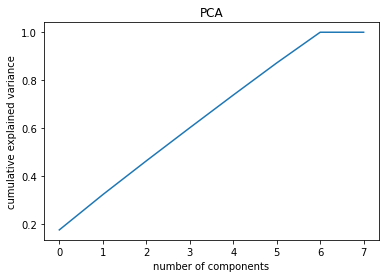

Cumulative explained variation for 2 principalcomponents sur 8 components is : 0.3221035696396068
MCA PROCESS ELIMINATED 0  COLUMNS SINCE THEIR MISS_RATES >= 99%

C:\Users\USER\Anaconda3\lib\site-packages\light_famd\one_hot.py:29: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-do

C:\Users\USER\Anaconda3\lib\site-packages\light_famd\one_hot.py:29: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-do

FAMD(check_input=True, copy=False, engine='auto', n_components=15, n_iter=10,
     random_state=None)

In [14]:
from sklearn import preprocessing
from sklearn import decomposition
df_only_reg= df_2018[['Region']]
df_only_reg_dum = pd.get_dummies(df_only_reg, prefix=['reg'],columns = ['Region'])

# centred data hypothesis
std_scale = preprocessing.StandardScaler().fit(df_only_reg_dum)
X_scaled = std_scale.transform(df_only_reg_dum)

# show the amont of components required for a specific varianc
pca_range = decomposition.PCA().fit(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca_range.explained_variance_ratio_))
plt.title('PCA')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# limit the study to 2 components
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
pca_ratios = pca.explained_variance_ratio_
print('Cumulative explained variation for 2 principalcomponents sur {} components is : {}'.format(df_only_reg_dum.shape[1],
                                                                                                   pca.explained_variance_ratio_.sum()))
#Factor Analysis of Mixed Data
from light_famd import FAMD
famd = FAMD(n_components=15,n_iter=10)
df_wh_target = df_2018.drop(columns='ROI criterium')
famd.fit(df_wh_target)
#print(famd.explained_variance_ratio_)

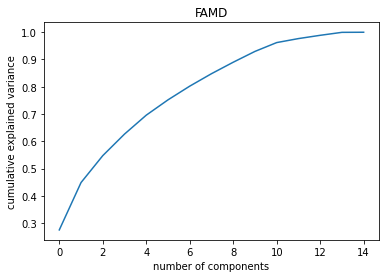

In [15]:
# show the amont of components required for a specific variance
plt.figure()
plt.plot(np.cumsum(famd.explained_variance_ratio_))
plt.title('FAMD')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- The PCA on Region shows that one can not reduce the dimensions in space only describing the dummified values of the feature Region. Similar result is found for FacilityType. Not shown here but same step can be followed.

- A finer approach was then performed, by studying the FAMD on the features of the df without the target. FAMD allows us to study both the features containing numerical and categorical values at once. We notice that the cumulative explained variance reaches 90% for 10 features.

- The data is not separated into a train and test set for the sequential feature selection. Once the features selected, 3 new daframes will be created. One  with those forward selected features and the dummified features Region and FacilityType and one with backwards selected features and the dummified features Region and FacilityType. The last dataframe contains all the features and the features with categorical values are dumified.

- The stepwise regression selection can be used if needed: https://pypi.org/project/stepwise-regression/#description 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.9s finished

[2020-06-21 13:04:43] Features: 1/3 -- score: -551.9210867199664[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.1s finished

[2020-06-21 13:04:48] Features: 2/3 -- score: -89.24883233269156[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s finished

[2020-06-21 13:04:53] Features: 3/3 -- score: -45.81532326524708

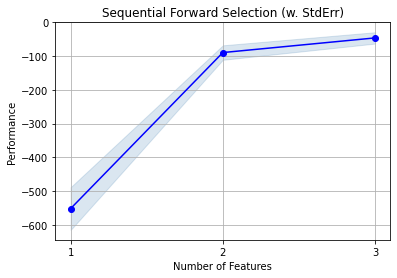

3 features selected: ['Area2refArea', 'SolarPanel(kWh)_Etot', 'Energy_tot(kWh_Area)']


In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# removing features containing the categorial data and features strongly correlated with target
df_forSFS = df_2018.drop(columns=['Region',
                                  'FacilityType'])

scaler_forSFS = MinMaxScaler()

X_forSFS = df_forSFS .drop(['ROI criterium'], axis=1)
y_forSFS = df_forSFS ['ROI criterium']

# the number of features selected should not be higher than half of the total number of features
max_num_feat = int(np.ceil(X_forSFS.shape[1]/2))

X_mms_forSFS = X_forSFS
X_mms_forSFS[X_mms_forSFS.columns] = scaler_forSFS.fit_transform(X_mms_forSFS[X_mms_forSFS.columns])

#a RandomForestRegressor model with 100 iterations
lr_sfs = RandomForestRegressor(n_estimators=100, random_state = 42, n_jobs = -1)
sfs_lr_fs = SFS(lr_sfs, k_features=(1,max_num_feat), forward=True, floating=False, verbose=2,scoring='neg_mean_squared_error',cv=6,n_jobs=-1)
 

#sfs_lr_fs = sfs_lr_fs.fit(X_forSFS_train, y_forSFS_train)
sfs_lr_fs = sfs_lr_fs.fit(X_forSFS, y_forSFS)
#X_mms_forSFS.describe()
fig = plot_sfs(sfs_lr_fs.get_metric_dict(), kind='std_err')
#plt.ylim([-500, 0])
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

X_forSFS_fs_subset = sfs_lr_fs.transform(X_forSFS)
df_sfs_fs_subset = pd.DataFrame(X_forSFS_fs_subset)
df_sfs_fs_subset.columns = sfs_lr_fs.k_feature_names_
print('{} features selected: {}'.format(df_sfs_fs_subset.shape[1],df_sfs_fs_subset.columns.tolist()))

**Backwards selection based on random forest regression. For the example purpose let's reduce the max number of features for the backwards selection**

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.1s finished

[2020-06-18 14:07:44] Features: 4/1 -- score: -45.5615774198601[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.8s finished

[2020-06-18 14:07:50] Features: 3/1 -- score: -45.815323265247066[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s finished

[2020-06-18 14:07:55] Features: 2/1 -- score: -89.24883233269156[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.6s finished

[2020-06-18 14:07:58] Features: 1/1 -- score: -551.9210867199664

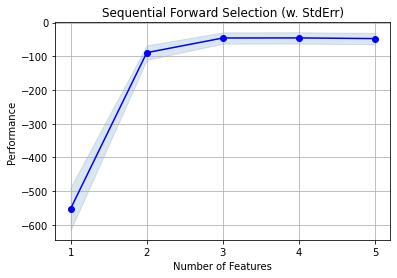

2 features selected by the backward selection: ['Area2refArea', 'Energy_tot(kWh_Area)']


In [4]:
sfs_lr_bs = SFS(lr_sfs, k_features=(1,max_num_feat-1), forward=False, floating=False, verbose=2,scoring='neg_mean_squared_error',cv=6,n_jobs=-1)
sfs_lr_bs = sfs_lr_bs.fit(X_forSFS, y_forSFS)
#X_mms_forSFS.describe()
fig = plot_sfs(sfs_lr_bs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

X_forSFS_bs_subset = sfs_lr_bs.transform(X_forSFS)
df_sfs_bs_subset = pd.DataFrame(X_forSFS_bs_subset)
df_sfs_bs_subset.columns = sfs_lr_bs.k_feature_names_
print('{} features selected by the backward selection: {}'.format(df_sfs_bs_subset.shape[1],df_sfs_bs_subset.columns.tolist()))

Dataframes' selection

In [2]:
# First dataframe: forward selected features and dummified categorical features.
df1 = df_2018.drop(columns=['Hotwater(kWh)_Etot',
                            'Wind(kWh)_Etot'])

df1_inter = pd.get_dummies(df1, prefix=['reg'],columns = ['Region'])
df1_dum= pd.get_dummies(df1_inter, prefix=['ft'],columns = ['FacilityType'])

# Second dataframe: backwards selected features and dummified categorical features.
df2 = df_2018.drop(columns=['Hotwater(kWh)_Etot',
                            'Wind(kWh)_Etot',
                            'SolarPanel(kWh)_Etot'])

df2_inter = pd.get_dummies(df2, prefix=['reg'],columns = ['Region'])
df2_dum= pd.get_dummies(df2_inter, prefix=['ft'],columns = ['FacilityType'])


# Third dataframe: full df with dummified categorical feature
df3 = df_2018.copy()

df3_inter = pd.get_dummies(df3, prefix=['reg'],columns = ['Region'])
df3_dum= pd.get_dummies(df3_inter, prefix=['ft'],columns = ['FacilityType'])


from sklearn import preprocessing
from sklearn import decomposition
df_no_targ = df3_dum.drop(columns=['ROI criterium'])
std_scale_no_targ  = preprocessing.StandardScaler().fit(df_no_targ )
X_scaled_no_targ  = std_scale_no_targ.transform(df_no_targ )

# limit the study to 2 components
pca_no_targ = decomposition.PCA(n_components=2)
pca_no_targ.fit(X_scaled_no_targ)
pca_ratios_no_targ = pca_no_targ.explained_variance_ratio_
print('df3, Cumulative explained variation for 2 principal components on {} components is: {}'.format(df_no_targ.shape[1],
                                                                                                 pca_no_targ.explained_variance_ratio_.sum()))

df3, Cumulative explained variation for 2 principal components on 20 components is: 0.24176314138151128


**Function to compute the R2 score, the RMSE and RMSLE**

In [3]:
# regression metrics
#from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

def Reg_metrics(reg_method_name,y_true,y_pred):
    df_reg_metrics = (pd.DataFrame({'Regression': [reg_method_name],
                                    'R2_score':[r2_score(y_true, y_pred,multioutput='variance_weighted')],
                                    'RMSE':[np.sqrt(mean_squared_error(y_true, y_pred))],
                                    'RMSLE':[np.sqrt(mean_squared_log_error(y_true, abs(y_pred)))]}))
    return df_reg_metrics

**Create the X dataframe with variables and the target array \
each column of X is scaled based on their max and min values**

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()

X1 = df1_dum.drop(['ROI criterium'], axis=1)
y1 = df1_dum['ROI criterium']

X2 = df2_dum.drop(['ROI criterium'], axis=1)
y2 = df2_dum['ROI criterium']

X3 = df3_dum.drop(['ROI criterium'], axis=1)
y3 = df3_dum['ROI criterium']

X_mms_1 = X1
X_mms_1[X_mms_1.columns] = scaler1.fit_transform(X_mms_1[X_mms_1.columns])

X_mms_2 = X2
X_mms_2[X_mms_2.columns] = scaler2.fit_transform(X_mms_2[X_mms_2.columns])

X_mms_3 = X3
X_mms_3[X_mms_3.columns] = scaler3.fit_transform(X_mms_3[X_mms_3.columns])

X_mms_3.describe()

,Area2refArea,Hotwater(kWh)_Etot,SolarPanel(kWh)_Etot,Wind(kWh)_Etot,Energy_tot(kWh_Area),reg_A,reg_B,reg_C,reg_E,reg_F,reg_G,reg_I,reg_K,ft_Beach,ft_Hotel,ft_Office,ft_Restaurant,ft_School,ft_Spa,ft_Store
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,0.138659,0.010218,0.564982,0.425773,0.092226,0.099022,0.350856,0.091687,0.122249,0.168704,0.064792,0.080685,0.022005,0.321516,0.024450,0.294621,0.025672,0.114914,0.133252,0.085575
std,0.133876,0.092134,0.360641,0.360364,0.089323,0.298874,0.477530,0.288760,0.327774,0.374720,0.246309,0.272517,0.146789,0.467344,0.154536,0.456151,0.158253,0.319114,0.340055,0.279906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.057726,0.000000,0.223486,0.000000,0.037018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.090438,0.000000,0.499064,0.474567,0.069690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.160761,0.000000,1.000000,0.771152,0.118439,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Train/Test split**

In [5]:
from sklearn import model_selection
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X_mms_1,y1,train_size=0.8, random_state=42)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X_mms_2,y2,train_size=0.8, random_state=42)
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X_mms_3,y3,train_size=0.8, random_state=42)

**As an example, checking if the values in some features are normally distributed**

In [23]:
from scipy.stats import shapiro
from scipy.stats import mstats
from statsmodels.stats import weightstats

def Normality_check(arr,str1ng):
    stat_sw, p_sw = shapiro(arr)
    stat_nt, p_nt = mstats.normaltest(arr) # D’Agostino 
    print('Shapiro-Wilk for the array %s has: Statistics=%.3f and p=%.5f' % (str1ng,stat_sw,p_sw))
    print('D’Agostino for the array %s has: Statistics=%.3f and p=%.5f' % (str1ng,stat_nt,p_nt))
    print('')
    return

#checking normaly distributed
print('Chekcing Normaly distributed before the Z test \n')
Normality_check(df1_dum['Energy_tot(kWh_Area)'],'Energy_tot(kWh_Area)')
Normality_check(df1_dum['Area2refArea'],'Area2refArea')
Normality_check(df1_dum['SolarPanel(kWh)_Etot'],'SolarPanel(kWh)_Etot')

# Z test
stat_z_1_etot ,p_z_1_etot = weightstats.ztest(y1_test, df1_dum['Energy_tot(kWh_Area)'],alternative='two-sided')
print('Z test on target array and the feature: Energy_tot(kWh_Area), Statistics=%.3f, p=%.7f' % (stat_z_1_etot ,p_z_1_etot))
stat_z_1_ar ,p_z_1_ar = weightstats.ztest(y1_test, df1_dum['Area2refArea'],alternative='two-sided')
print('Z test on target array and the feature: Area2refArea, Statistics=%.3f, p=%.7f' % (stat_z_1_ar ,p_z_1_ar))
stat_z_1_sp ,p_z_1_sp = weightstats.ztest(y1_test, df1_dum['SolarPanel(kWh)_Etot'],alternative='two-sided')
print('Z test on target array and the feature: SolarPanel(kWh)_Etot, Statistics=%.3f, p=%.7f' % (stat_z_1_sp ,p_z_1_sp))

Chekcing Normaly distributed before the Z test 

Shapiro-Wilk for the array Energy_tot(kWh_Area) has: Statistics=0.738 and p=0.00000
D’Agostino for the array Energy_tot(kWh_Area) has: Statistics=638.605 and p=0.00000

Shapiro-Wilk for the array Area2refArea has: Statistics=0.722 and p=0.00000
D’Agostino for the array Area2refArea has: Statistics=467.564 and p=0.00000

Shapiro-Wilk for the array SolarPanel(kWh)_Etot has: Statistics=0.840 and p=0.00000
D’Agostino for the array SolarPanel(kWh)_Etot has: Statistics=4347.553 and p=0.00000

Z test on target array and the feature: Energy_tot(kWh_Area), Statistics=66.569, p=0.0000000
Z test on target array and the feature: Area2refArea, Statistics=-12.131, p=0.0000000
Z test on target array and the feature: SolarPanel(kWh)_Etot, Statistics=74.783, p=0.0000000


**Linear regression model**

In [97]:
from sklearn.model_selection import cross_val_score # for cross-validation evaluation
from sklearn.linear_model import LinearRegression
import timeit

l_reg_1 = LinearRegression()
l_reg_2 = LinearRegression()
l_reg_3 = LinearRegression()


# Model evaluation by cross-validation
l_reg_1_score = cross_val_score(l_reg_1, X1_train, y1_train, cv=6, n_jobs= -1)# Model evaluation by cross-validation
l_reg_2_score = cross_val_score(l_reg_2, X2_train, y2_train, cv=6, n_jobs= -1)
l_reg_3_score = cross_val_score(l_reg_3, X3_train, y3_train, cv=6, n_jobs= -1)

# start time 
start_l_reg_1 = timeit.default_timer()

# Fit the model to the training set
l_reg_1.fit(X1_train, y1_train)

#end time and time difference
time_l_reg_1 = timeit.default_timer() - start_l_reg_1

# similarly for X2
start_l_reg_2 = timeit.default_timer()
l_reg_2.fit(X2_train, y2_train)
time_l_reg_2 = timeit.default_timer() - start_l_reg_2

# similarly for X3
start_l_reg_3 = timeit.default_timer()
l_reg_3.fit(X3_train, y3_train)
time_l_reg_3 = timeit.default_timer() - start_l_reg_3

# Compute predictions from the test set
y1_pred = l_reg_1.predict(X1_test)
y2_pred = l_reg_2.predict(X2_test)
y3_pred = l_reg_3.predict(X3_test)

df_lin_reg_1 = Reg_metrics('lin_reg_1',y1_test,y1_pred)
df_lin_reg_1['CPU_time(s)'] = time_l_reg_1
df_lin_reg_2 = Reg_metrics('lin_reg_2',y2_test,y2_pred)
df_lin_reg_2['CPU_time(s)'] = time_l_reg_2
df_lin_reg_3 = Reg_metrics('lin_reg_3',y3_test,y3_pred)
df_lin_reg_3['CPU_time(s)'] = time_l_reg_3


# store df_lin_reg in a df df_m that will compare all methods
df_m = df_lin_reg_1
df_m = df_m.append(df_lin_reg_2)
df_m = df_m.append(df_lin_reg_3)

df_m

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,lin_reg_1,0.707107,12.483451,0.166490,0.005301
0,lin_reg_2,0.670481,13.240977,0.180048,0.005344
0,lin_reg_3,0.705343,12.520981,0.171142,0.005572


In [28]:
arr_col_x2 = np.array(df2_dum.drop(columns=['ROI criterium']).columns.values.tolist())
df_coef_lin_reg_2 = pd.DataFrame({'Features':arr_col_x2 ,'Lin_reg_coef Dataframe 2':abs(l_reg_2.coef_)})
df_coef_lin_reg_2.sort_values(by=['Lin_reg_coef Dataframe 2'], ascending=False).head()

,Features,Lin_reg_coef Dataframe 2
1,Energy_tot(kWh_Area),229.612234
0,Area2refArea,101.512378
14,ft_School,10.157853
15,ft_Spa,8.668405
6,reg_F,3.933420


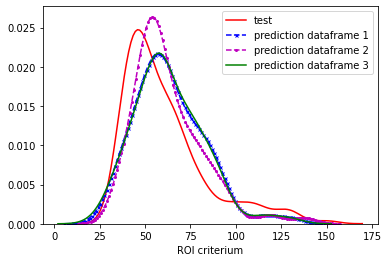

In [29]:
# Visualize the predictions against the actual target values
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot1 = sns.distplot(y1_pred, hist=False,kde_kws={'linestyle':'dashed','marker':'x','markersize':'3'}, 
                         color='b',label='prediction dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred, hist=False, kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',label='prediction dataframe 2', ax=ax_test)
sns_plot3 = sns.distplot(y3_pred, hist=False, color='g',label='prediction dataframe 3', ax=ax_test)

**Ridge Regression**

In [30]:
from sklearn.linear_model import RidgeCV
alph = np.geomspace(0.00001, 10000, num=10).tolist()

rig_reg_grid_1 = RidgeCV(alphas=alph,cv=6).fit(X1_train, y1_train)
rig_reg_grid_2 = RidgeCV(alphas=alph,cv=6).fit(X2_train, y2_train)
rig_reg_grid_3 = RidgeCV(alphas=alph,cv=6).fit(X3_train, y3_train)

# Evaluate hyperparameter
print("The best alpha for df1 is : {}".format(rig_reg_grid_1.alpha_))
print("The best alpha for df2 is : {}".format(rig_reg_grid_2.alpha_))
print("The best alpha for df3 is : {}".format(rig_reg_grid_3.alpha_))

The best alpha for df1 is : 0.1
The best alpha for df2 is : 0.1
The best alpha for df3 is : 0.1


In [98]:
start_rig_reg_1 = timeit.default_timer()
rig_reg_1 = RidgeCV(alphas=[rig_reg_grid_1.alpha_]).fit(X1_train, y1_train)
time_rig_reg_1 = timeit.default_timer() - start_rig_reg_1

start_rig_reg_2 = timeit.default_timer()
rig_reg_2 = RidgeCV(alphas=[rig_reg_grid_2.alpha_]).fit(X2_train, y2_train)
time_rig_reg_2 = timeit.default_timer() - start_rig_reg_2

start_rig_reg_3 = timeit.default_timer()
rig_reg_3= RidgeCV(alphas=[rig_reg_grid_3.alpha_]).fit(X3_train, y3_train)
time_rig_reg_3 = timeit.default_timer() - start_rig_reg_3

# Compute predictions from the test set
y1_pred_rig_reg = rig_reg_1.predict(X1_test)
y2_pred_rig_reg = rig_reg_2.predict(X2_test)
y3_pred_rig_reg = rig_reg_3.predict(X3_test)

df_rig_reg_1 = Reg_metrics('rig_reg_1',y1_test,y1_pred_rig_reg)
df_rig_reg_1['CPU_time(s)'] = time_rig_reg_1
df_m = df_m.append(df_rig_reg_1)

df_rig_reg_2 = Reg_metrics('rig_reg_2',y2_test,y2_pred_rig_reg)
df_rig_reg_2['CPU_time(s)'] = time_rig_reg_2
df_m = df_m.append(df_rig_reg_2)

df_rig_reg_3 = Reg_metrics('rig_reg_3',y3_test,y3_pred_rig_reg)
df_rig_reg_3['CPU_time(s)'] = time_rig_reg_3
df_m = df_m.append(df_rig_reg_3)

df_m.tail(3)

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,rig_reg_1,0.702565,12.579873,0.171442,0.010461
0,rig_reg_2,0.669176,13.267175,0.180861,0.009795
0,rig_reg_3,0.701998,12.591843,0.171457,0.008496


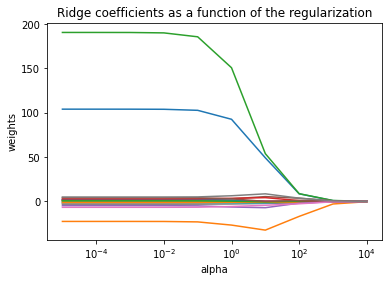

In [32]:
baseline_error = np.mean((l_reg_1.predict(X1_test) - y1_test) ** 2)
coefs_rig_reg = []
errors_rig_reg = []
for a in alph:
    rig_reg_a = RidgeCV(alphas=[a],cv=6).fit(X1_train, y1_train)
    coefs_rig_reg.append(rig_reg_a.coef_)
    errors_rig_reg.append([baseline_error, np.mean((rig_reg_a.predict(X1_test) - y1_test) ** 2)])

ax = plt.gca()

ax.plot(alph, coefs_rig_reg)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

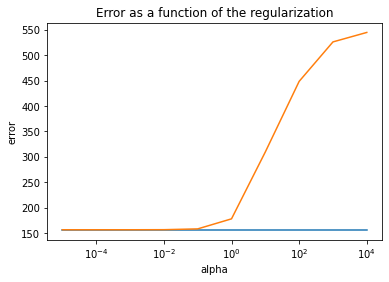

In [33]:
ax = plt.gca()

ax.plot(alph, errors_rig_reg)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Error as a function of the regularization')
plt.axis('tight')
plt.show()

In [34]:
arr_col_x1 = np.array(df1_dum.drop(columns=['ROI criterium']).columns.values.tolist())
df_coef_rig_reg_1 = pd.DataFrame({'Features':arr_col_x1 , 'Rig_reg_coef Dataframe 1':abs(rig_reg_1.coef_)})
df_coef_rig_reg_1.sort_values(by=['Rig_reg_coef Dataframe 1'], ascending=False).head()

,Features,Rig_reg_coef Dataframe 1
2,Energy_tot(kWh_Area),185.751057
0,Area2refArea,102.794192
1,SolarPanel(kWh)_Etot,23.108623
16,ft_Spa,6.531540
17,ft_Store,5.083692


In [36]:
arr_col_x2 = np.array(df2_dum.drop(columns=['ROI criterium']).columns.values.tolist())
df_coef_lin_reg_2 = pd.DataFrame({'Features':arr_col_x2 ,'Lin_reg_coef Dataframe 2':abs(rig_reg_2.coef_)})
df_coef_lin_reg_2.sort_values(by=['Lin_reg_coef Dataframe 2'], ascending=False).head()

,Features,Lin_reg_coef Dataframe 2
1,Energy_tot(kWh_Area),224.824042
0,Area2refArea,100.067600
14,ft_School,10.113023
15,ft_Spa,8.569837
6,reg_F,3.929448


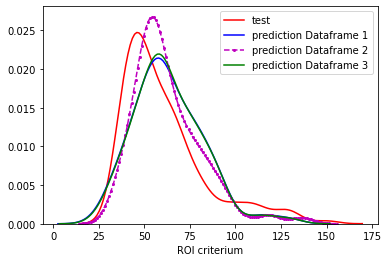

In [37]:
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot1 = sns.distplot(y1_pred_rig_reg, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_rig_reg, hist=False, kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, color='m',
                         label='prediction Dataframe 2', ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_rig_reg, hist=False, color='g',label='prediction Dataframe 3', ax=ax_test)

**Lasso's method**

In [38]:
from sklearn.linear_model import LassoCV
alph_lasso = np.geomspace(0.001, 1000, num=7).tolist()

lasso_reg_grid_1 = LassoCV(alphas=alph_lasso ,cv=6).fit(X1_train, y1_train)
lasso_reg_grid_2 = LassoCV(alphas=alph_lasso ,cv=6).fit(X2_train, y2_train)
lasso_reg_grid_3 = LassoCV(alphas=alph_lasso ,cv=6).fit(X3_train, y3_train)

# Evaluate best hyperparameter alpha
print("The best alpha for df1 is: {}".format(lasso_reg_grid_1.alpha_))
print("The best alpha for df2 is: {}".format(lasso_reg_grid_2.alpha_))
print("The best alpha for df3 is: {}".format(lasso_reg_grid_3.alpha_))

The best alpha for df1 is: 0.1
The best alpha for df2 is: 0.1
The best alpha for df3 is: 0.1


In [99]:
start_lasso_reg_1 = timeit.default_timer()
lasso_reg_1= LassoCV(alphas=[lasso_reg_grid_1.alpha_],cv=6).fit(X1_train, y1_train)
time_lasso_reg_1 = timeit.default_timer() - start_lasso_reg_1

start_lasso_reg_2 = timeit.default_timer()
lasso_reg_2 = LassoCV(alphas=[lasso_reg_grid_2.alpha_],cv=6).fit(X2_train, y2_train)
time_lasso_reg_2 = timeit.default_timer() - start_lasso_reg_2

start_lasso_reg_3 = timeit.default_timer()
lasso_reg_3= LassoCV(alphas=[lasso_reg_grid_3.alpha_],cv=6).fit(X3_train, y3_train)
time_lasso_reg_3 = timeit.default_timer() - start_lasso_reg_3

# Compute predictions from the test set
y1_pred_lasso_reg = lasso_reg_1.predict(X1_test)
y2_pred_lasso_reg = lasso_reg_2.predict(X2_test)
y3_pred_lasso_reg = lasso_reg_3.predict(X3_test)

df_lasso_reg_1 = Reg_metrics('lasso_reg_1',y1_test,y1_pred_lasso_reg)
df_lasso_reg_1['CPU_time(s)'] = time_lasso_reg_1
df_m = df_m.append(df_lasso_reg_1)

df_lasso_reg_2 = Reg_metrics('lasso_reg_2',y2_test,y2_pred_lasso_reg)
df_lasso_reg_2['CPU_time(s)'] = time_lasso_reg_2
df_m = df_m.append(df_lasso_reg_2)

df_lasso_reg_3 = Reg_metrics('lasso_reg_3',y3_test,y3_pred_lasso_reg)
df_lasso_reg_3['CPU_time(s)'] = time_lasso_reg_3
df_m = df_m.append(df_lasso_reg_3)

df_m.tail(3)

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,lasso_reg_1,0.697515,12.686205,0.170219,0.046121
0,lasso_reg_2,0.675665,13.136411,0.178537,0.034585
0,lasso_reg_3,0.697887,12.678416,0.169976,0.037441


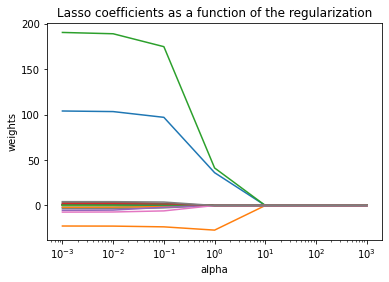

In [40]:
coefs_lasso_reg = []
errors_lasso_reg = []
for a in alph_lasso:
    lasso_reg_a = LassoCV(alphas=[a],cv=6).fit(X1_train, y1_train)
    coefs_lasso_reg.append(lasso_reg_a.coef_)
    errors_lasso_reg.append([baseline_error, np.mean((lasso_reg_a.predict(X1_test) - y1_test) ** 2)])

ax = plt.gca()

ax.plot(alph_lasso, coefs_lasso_reg)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

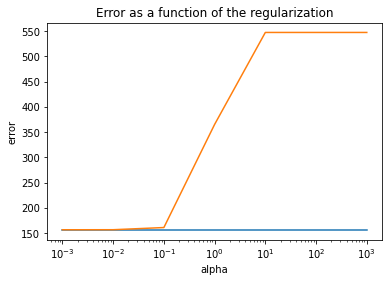

In [41]:
ax = plt.gca()

ax.plot(alph_lasso, errors_lasso_reg)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Error as a function of the regularization')
plt.axis('tight')
plt.show()

In [42]:
df_coef_lasso_reg = pd.DataFrame({'Features':arr_col_x1 , 'Lasso_reg_coef Dataframe 1':abs(lasso_reg_1.coef_)})
df_coef_lasso_reg.sort_values(by=['Lasso_reg_coef Dataframe 1'], ascending=False).head()

,Features,Lasso_reg_coef Dataframe 1
2,Energy_tot(kWh_Area),174.852586
0,Area2refArea,97.056086
1,SolarPanel(kWh)_Etot,23.506047
16,ft_Spa,5.941493
17,ft_Store,3.807723


In [43]:
df_coef_lasso_reg_2 = pd.DataFrame({'Features':arr_col_x2 ,'Lasso_reg_coef Dataframe 2':abs(lasso_reg_2.coef_)})
df_coef_lasso_reg_2.sort_values(by=['Lasso_reg_coef Dataframe 2'], ascending=False).head()

,Features,Lasso_reg_coef Dataframe 2
1,Energy_tot(kWh_Area),215.413228
0,Area2refArea,93.912842
14,ft_School,10.426136
15,ft_Spa,6.111470
6,reg_F,3.605894


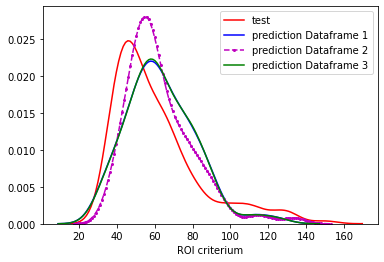

In [44]:
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot1 = sns.distplot(y1_pred_lasso_reg, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_lasso_reg, hist=False, kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',label='prediction Dataframe 2', ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_lasso_reg, hist=False, color='g',label='prediction Dataframe 3', ax=ax_test)

**Kernel Ridge**

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

params_krr={"alpha": [1e0, 0.1, 1e-2, 1e-3],"gamma": np.logspace(-2, 2, 5)}
krr_grid_1 = GridSearchCV(KernelRidge(kernel='rbf'),param_grid=params_krr,cv=6)
krr_grid_1.fit(X1_train, y1_train)

krr_grid_2 = GridSearchCV(KernelRidge(kernel='rbf'),param_grid=params_krr,cv=6)
krr_grid_2.fit(X2_train, y2_train)

krr_grid_3 = GridSearchCV(KernelRidge(kernel='rbf'),param_grid=params_krr,cv=6)
krr_grid_3.fit(X3_train, y3_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                                   kernel='rbf', kernel_params=None),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
print(krr_grid_1.best_params_)
print(krr_grid_2.best_params_)
print(krr_grid_3.best_params_)

{'alpha': 0.001, 'gamma': 0.1}
{'alpha': 0.001, 'gamma': 1.0}
{'alpha': 0.001, 'gamma': 0.1}


In [100]:
start_krr_1 = timeit.default_timer()
krr_1 =KernelRidge(kernel='rbf', gamma=krr_grid_1.best_params_['gamma'], 
                      alpha=krr_grid_1.best_params_['alpha']).fit(X1_train, y1_train)
time_krr_1 = timeit.default_timer() - start_krr_1

start_krr_2 = timeit.default_timer()
krr_2 =KernelRidge(kernel='rbf', gamma=krr_grid_2.best_params_['gamma'], 
                      alpha=krr_grid_2.best_params_['alpha']).fit(X2_train, y2_train)
time_krr_2 = timeit.default_timer() - start_krr_2

start_krr_3 = timeit.default_timer()
krr_3 =KernelRidge(kernel='rbf', gamma=krr_grid_3.best_params_['gamma'], 
                      alpha=krr_grid_3.best_params_['alpha']).fit(X3_train, y3_train)
time_krr_3 = timeit.default_timer() - start_krr_3

# Compute predictions from the test set
y1_pred_krr = krr_1.predict(X1_test)
y2_pred_krr = krr_2.predict(X2_test)
y3_pred_krr = krr_3.predict(X3_test)


df_krr_1 = Reg_metrics('krr_1',y1_test,y1_pred_krr)
df_krr_1['CPU_time(s)'] = time_krr_1
df_m = df_m.append(df_krr_1)

df_krr_2 = Reg_metrics('krr_2',y2_test,y2_pred_krr)
df_krr_2['CPU_time(s)'] = time_krr_2
df_m = df_m.append(df_krr_2)

df_krr_3 = Reg_metrics('krr_3',y3_test,y3_pred_krr)
df_krr_3['CPU_time(s)'] = time_krr_3
df_m = df_m.append(df_krr_3)

df_m.tail(3)

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,krr_1,0.868645,8.359931,0.114940,0.086854
0,krr_2,0.781415,10.784247,0.127376,0.080002
0,krr_3,0.846856,9.026729,0.123928,0.078201


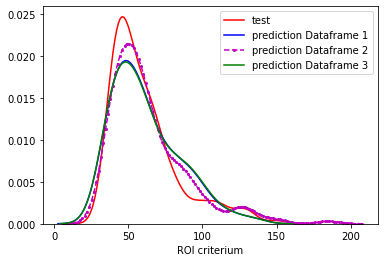

In [48]:
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot1 = sns.distplot(y1_pred_krr, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_krr, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',
                         label='prediction Dataframe 2',
                         ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_krr, hist=False, color='g',label='prediction Dataframe 3', ax=ax_test)

**Support vector regression**

In [49]:
from sklearn.svm import SVR
param_svr ={"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)}
svr_grid_1= GridSearchCV(SVR(kernel='rbf'),param_grid=param_svr,cv=6)
svr_grid_2 = GridSearchCV(SVR(kernel='rbf'),param_grid=param_svr,cv=6)
svr_grid_3 = GridSearchCV(SVR(kernel='rbf'),param_grid=param_svr,cv=6)
svr_grid_1.fit(X1_train, y1_train)
svr_grid_2.fit(X2_train, y2_train)
svr_grid_3.fit(X3_train, y3_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
print(svr_grid_1.best_params_)
print(svr_grid_2.best_params_)
print(svr_grid_3.best_params_)

{'C': 1000.0, 'gamma': 1.0}
{'C': 1000.0, 'gamma': 1.0}
{'C': 1000.0, 'gamma': 0.1}


In [101]:
start_svr_1 = timeit.default_timer()
svr_1 =SVR(kernel='rbf', gamma=svr_grid_1.best_params_['gamma'],C=svr_grid_1.best_params_['C']).fit(X1_train, y1_train)
time_svr_1 = timeit.default_timer() - start_svr_1

start_svr_2 = timeit.default_timer()
svr_2 =SVR(kernel='rbf', gamma=svr_grid_2.best_params_['gamma'],C=svr_grid_2.best_params_['C']).fit(X2_train, y2_train)
time_svr_2 = timeit.default_timer() - start_svr_2

start_svr_3 = timeit.default_timer()
svr_3 =SVR(kernel='rbf', gamma=svr_grid_3.best_params_['gamma'],C=svr_grid_3.best_params_['C']).fit(X3_train, y3_train)
time_svr_3 = timeit.default_timer() - start_svr_3

# Compute predictions from the test set
y1_pred_svr = abs(svr_1.predict(X1_test))
y2_pred_svr = abs(svr_2.predict(X2_test))
y3_pred_svr = abs(svr_3.predict(X3_test))

df_svr_1 = Reg_metrics('svr_1',y1_test,y1_pred_svr)
df_svr_1['CPU_time(s)'] = time_svr_1
df_m = df_m.append(df_svr_1)

df_svr_2 = Reg_metrics('svr_2',y2_test,y2_pred_svr)
df_svr_2['CPU_time(s)'] = time_svr_2
df_m = df_m.append(df_svr_2)

df_svr_3 = Reg_metrics('svr_3',y3_test,y3_pred_svr)
df_svr_3['CPU_time(s)'] = time_svr_3
df_m = df_m.append(df_svr_3)

df_m.tail(3)

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,svr_1,0.812681,9.983223,0.125314,0.543405
0,svr_2,0.697258,12.691589,0.159361,0.179774
0,svr_3,0.784157,10.716397,0.134014,0.213341


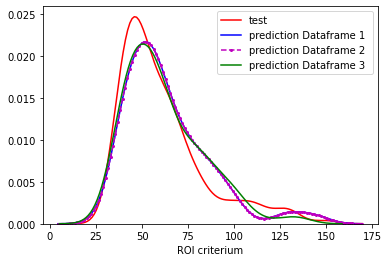

In [52]:
ax_test = sns.distplot(y2_test, hist=False, color='r', label='test')
sns_plot1 = sns.distplot(y2_pred_svr, hist=False, color='b',label='prediction Dataframe 1 ', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_svr, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',
                         label='prediction Dataframe 2',
                         ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_svr, hist=False, color='g',label='prediction Dataframe 3', ax=ax_test)

**k nearest neighbors**

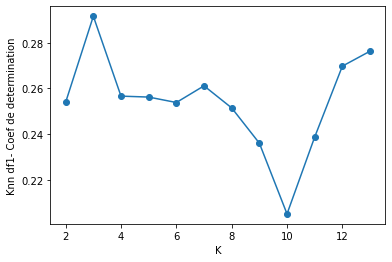

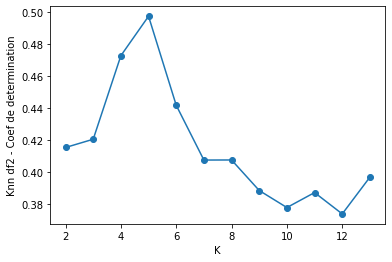

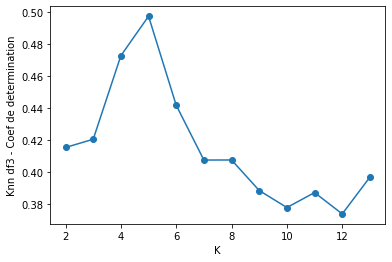

In [53]:
#from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

Coef_deter_knn_1 = [] 
Coef_deter_knn_2 = []
Coef_deter_knn_3 = []
rang_k = range(2,14)
for knn_k in rang_k:
    knnselect_1 = neighbors.KNeighborsRegressor(knn_k)
    knnselect_2 = neighbors.KNeighborsRegressor(knn_k)
    knnselect_3 = neighbors.KNeighborsRegressor(knn_k)
    knnselect_1.fit(X1_train, y1_train) 
    knnselect_2.fit(X2_train, y2_train)
    knnselect_3.fit(X3_train, y3_train)
    Coef_deter_knn_1.append(knnselect_1.score(X1_test, y1_test))
    Coef_deter_knn_2.append(knnselect_2.score(X2_test, y2_test))
    Coef_deter_knn_3.append(knnselect_3.score(X3_test, y3_test))
    
plt.plot(rang_k, Coef_deter_knn_1, 'o-')
plt.ylabel("Knn df1- Coef de determination")
plt.xlabel('K')
plt.show() 

plt.plot(rang_k, Coef_deter_knn_2, 'o-')
plt.ylabel("Knn df2 - Coef de determination")
plt.xlabel('K')
plt.show()

plt.plot(rang_k, Coef_deter_knn_2, 'o-')
plt.ylabel("Knn df3 - Coef de determination")
plt.xlabel('K')
plt.show() 

In [102]:
k_opt_1 = 3
k_opt_2 = 5
k_opt_3 = 5

knn_reg_opt_1 = neighbors.KNeighborsRegressor(k_opt_1)
knn_reg_opt_2 = neighbors.KNeighborsRegressor(k_opt_2)
knn_reg_opt_3 = neighbors.KNeighborsRegressor(k_opt_3)

knn_reg_opt_score_1 = cross_val_score(knn_reg_opt_1, X1_train, y1_train, cv=6)
knn_reg_opt_score_2 = cross_val_score(knn_reg_opt_2, X2_train, y2_train, cv=6)
knn_reg_opt_score_3 = cross_val_score(knn_reg_opt_3, X3_train, y3_train, cv=6)

start_knn_reg_1 = timeit.default_timer()
knn_reg_opt_1.fit(X1_train, y1_train)
time_knn_reg_1 = timeit.default_timer() - start_knn_reg_1

start_knn_reg_2 = timeit.default_timer()
knn_reg_opt_2.fit(X2_train, y2_train)
time_knn_reg_2 = timeit.default_timer() - start_knn_reg_2

start_knn_reg_3 = timeit.default_timer()
knn_reg_opt_3.fit(X3_train, y3_train)
time_knn_reg_3 = timeit.default_timer() - start_knn_reg_3

y1_pred_knn = knn_reg_opt_1.predict(X1_test)
y2_pred_knn = knn_reg_opt_2.predict(X2_test)
y3_pred_knn = knn_reg_opt_3.predict(X3_test)

df_knn_reg_1 = Reg_metrics('knn_reg_1',y1_test,y1_pred_knn)
df_knn_reg_1['CPU_time(s)'] = time_knn_reg_1
df_m = df_m.append(df_knn_reg_1)

df_knn_reg_2 = Reg_metrics('knn_reg_2',y2_test,y2_pred_knn)
df_knn_reg_2['CPU_time(s)'] = time_knn_reg_2
df_m = df_m.append(df_knn_reg_2)

df_knn_reg_3 = Reg_metrics('knn_reg_3',y3_test,y3_pred_knn)
df_knn_reg_3['CPU_time(s)'] = time_knn_reg_3
df_m = df_m.append(df_knn_reg_3)

df_m.tail(3)

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,knn_reg_1,0.291641,19.413632,0.264339,0.009653
0,knn_reg_2,0.497214,16.355791,0.214340,0.010226
0,knn_reg_3,0.247402,20.010661,0.275754,0.010017


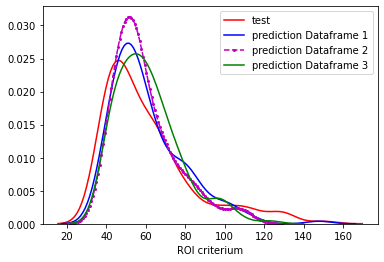

In [55]:
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot = sns.distplot(y1_pred_knn, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_knn, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',
                         label='prediction Dataframe 2',
                         ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_knn, hist=False, color='g',label='prediction Dataframe 3', ax=ax_test)

**Comparing knn with dummy algorithms**

In [56]:
from sklearn import dummy
from sklearn.metrics import mean_squared_error
dum_mean = dummy.DummyRegressor(strategy='mean')
dum_med = dummy.DummyRegressor(strategy='median')

# train
dum_mean.fit(X1_train, y1_train)
dum_med.fit(X1_train, y1_train)

# prediction
y1_pred_dum_mean = dum_mean.predict(X1_test)
y1_pred_dum_med = dum_med.predict(X1_test)

# Evaluation of the knn compared to dummy algorithms based on RMSE
print("RMSE Dummy Mean: {:.2f}".format(np.sqrt(mean_squared_error(y1_test, y1_pred_dum_mean))))
print("RMSE Dummy Constant: {:.2f}".format(np.sqrt(mean_squared_error(y1_test, y1_pred_dum_med))))
print("RMSE knn: {:.2f}".format(np.sqrt(mean_squared_error(y1_test, y1_pred_knn))))

RMSE Dummy Mean: 23.39
RMSE Dummy Constant: 23.60
RMSE knn: 19.41


**Decision tree*

In [57]:
from sklearn.model_selection import RandomizedSearchCV # for hyperparameters tuning
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': [5, 10], # Maximum number of levels in tree
               'min_samples_split': [5, 10], # Minimum number of samples required to split a node
               'min_samples_leaf': [2, 6], # Minimum number of samples required at each leaf node
               }
from sklearn.tree import DecisionTreeRegressor

# Instantiate a RandomizedSearchCV on a DecisionTreeRegressor model with 10 iterations
tree_reg_grid_1 = RandomizedSearchCV(estimator = DecisionTreeRegressor(),
                                     param_distributions = param_grid, n_iter = 10, verbose = 2, n_jobs = -1, cv=6)
tree_reg_grid_2 = RandomizedSearchCV(estimator = DecisionTreeRegressor(),
                                     param_distributions = param_grid, n_iter = 10, verbose = 2, n_jobs = -1, cv=6)
tree_reg_grid_3 = RandomizedSearchCV(estimator = DecisionTreeRegressor(),
                                     param_distributions = param_grid, n_iter = 10, verbose = 2, n_jobs = -1, cv=6)

tree_reg_grid_1.fit(X1_train, y1_train)
tree_reg_grid_2.fit(X2_train, y2_train)
tree_reg_grid_3.fit(X3_train, y3_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [58]:
# Check the best parameters found by RandomizedSearchCV
print(tree_reg_grid_1.best_params_)
tree_reg_1 = DecisionTreeRegressor(max_depth = tree_reg_grid_1.best_params_['max_depth'],
                                   min_samples_split=tree_reg_grid_1.best_params_['min_samples_split'],
                                   min_samples_leaf=tree_reg_grid_1.best_params_['min_samples_leaf'],
                                   max_features=tree_reg_grid_1.best_params_['max_features'])

print(tree_reg_grid_2.best_params_)
tree_reg_2 = DecisionTreeRegressor(max_depth = tree_reg_grid_2.best_params_['max_depth'],
                                   min_samples_split=tree_reg_grid_2.best_params_['min_samples_split'],
                                   min_samples_leaf=tree_reg_grid_2.best_params_['min_samples_leaf'],
                                   max_features=tree_reg_grid_2.best_params_['max_features'])

print(tree_reg_grid_3.best_params_)
tree_reg_3 = DecisionTreeRegressor(max_depth = tree_reg_grid_3.best_params_['max_depth'],
                                   min_samples_split=tree_reg_grid_3.best_params_['min_samples_split'],
                                   min_samples_leaf=tree_reg_grid_3.best_params_['min_samples_leaf'],
                                   max_features=tree_reg_grid_3.best_params_['max_features'])

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}


In [103]:
start_tree_reg_1 = timeit.default_timer()
tree_reg_1.fit(X1_train, y1_train)
time_tree_reg_1 = timeit.default_timer() - start_tree_reg_1

start_tree_reg_2 = timeit.default_timer()
tree_reg_2.fit(X2_train, y2_train)
time_tree_reg_2 = timeit.default_timer() - start_tree_reg_2

start_tree_reg_3 = timeit.default_timer()
tree_reg_3.fit(X3_train, y3_train)
time_tree_reg_3 = timeit.default_timer() - start_tree_reg_3

# Compute predictions from the test set
y1_pred_tree_reg = tree_reg_1.predict(X1_test)
y2_pred_tree_reg = tree_reg_2.predict(X2_test)
y3_pred_tree_reg = tree_reg_3.predict(X3_test)

df_tree_reg_1 = Reg_metrics('tree_reg_1',y1_test,y1_pred_tree_reg)
df_tree_reg_1['CPU_time(s)'] = time_tree_reg_1
df_m = df_m.append(df_tree_reg_1)

df_tree_reg_2 = Reg_metrics('tree_reg_2',y2_test,y2_pred_tree_reg)
df_tree_reg_2['CPU_time(s)'] = time_tree_reg_2
df_m = df_m.append(df_tree_reg_2)

df_tree_reg_3 = Reg_metrics('tree_reg_3',y3_test,y3_pred_tree_reg)
df_tree_reg_3['CPU_time(s)'] = time_tree_reg_3
df_m = df_m.append(df_tree_reg_3)

df_m.tail(3)

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,tree_reg_1,0.839256,9.247978,0.103206,0.008530
0,tree_reg_2,0.850261,8.925811,0.110152,0.008059
0,tree_reg_3,0.853859,8.817926,0.100313,0.008748


In [60]:
df_coef_tree_reg_1 = pd.DataFrame({'Features':arr_col_x1 ,'Tree_reg_coef Dataframe 1':abs(tree_reg_1.feature_importances_)})
df_coef_tree_reg_1.sort_values(by=['Tree_reg_coef Dataframe 1'], ascending=False).head()

,Features,Tree_reg_coef Dataframe 1
2,Energy_tot(kWh_Area),0.638853
0,Area2refArea,0.309382
1,SolarPanel(kWh)_Etot,0.051765
10,reg_K,0.000000
16,ft_Spa,0.000000


In [78]:
df_coef_tree_reg_2 = pd.DataFrame({'Features':arr_col_x2 ,'Tree_reg_coef Dataframe 2':abs(tree_reg_2.feature_importances_)})
df_coef_tree_reg_2.sort_values(by=['Tree_reg_coef Dataframe 2'], ascending=False).head()

,Features,Tree_reg_coef Dataframe 2
3,Energy_tot(kWh_Area),0.584332
0,Area2refArea,0.366434
2,SolarPanel(kWh)_Etot,0.046144
5,reg_B,0.000840
14,ft_Office,0.000822


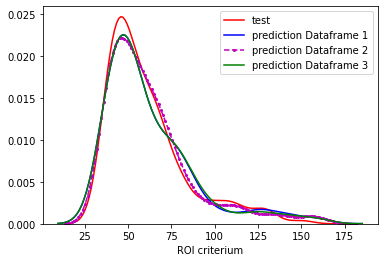

In [62]:
# Visualize the predictions against the actual values
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot = sns.distplot(y1_pred_tree_reg, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_tree_reg, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',
                         label='prediction Dataframe 2',
                         ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_tree_reg, hist=False, color='g',label='prediction Dataframe 3', ax=ax_test)

**Random forest**

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomizedSearchCV on a RandomForestRegressor model with 100 iterations
ranfor_reg_grid_1 = RandomizedSearchCV(RandomForestRegressor(n_estimators=100), 
                                       param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1,cv=6)
ranfor_reg_grid_2 = RandomizedSearchCV(RandomForestRegressor(n_estimators=100), 
                                       param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1,cv=6)
ranfor_reg_grid_3 = RandomizedSearchCV(RandomForestRegressor(n_estimators=100), 
                                       param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1,cv=6)

ranfor_reg_grid_1.fit(X1_train, y1_train)
ranfor_reg_grid_2.fit(X2_train, y2_train)
ranfor_reg_grid_3.fit(X3_train, y3_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 16 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   13.1s finished
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 16 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   11.1s finished
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 16 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   12.1s finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [64]:
# Check the best parameters found by RandomizedSearchCV
print(ranfor_reg_grid_1.best_params_)
print(ranfor_reg_grid_2.best_params_)
print(ranfor_reg_grid_3.best_params_)

ranfor_reg_1 = RandomForestRegressor(n_estimators=100,
                                     max_depth = ranfor_reg_grid_1.best_params_['max_depth'],
                                     min_samples_split=ranfor_reg_grid_1.best_params_['min_samples_split'],
                                     min_samples_leaf=ranfor_reg_grid_1.best_params_['min_samples_leaf'],
                                     max_features=ranfor_reg_grid_1.best_params_['max_features'])

ranfor_reg_2 = RandomForestRegressor(n_estimators=100,
                                     max_depth = ranfor_reg_grid_2.best_params_['max_depth'],
                                     min_samples_split=ranfor_reg_grid_2.best_params_['min_samples_split'],
                                     min_samples_leaf=ranfor_reg_grid_2.best_params_['min_samples_leaf'],
                                     max_features=ranfor_reg_grid_2.best_params_['max_features'])

ranfor_reg_3 = RandomForestRegressor(n_estimators=100,
                                     max_depth = ranfor_reg_grid_3.best_params_['max_depth'],
                                     min_samples_split=ranfor_reg_grid_3.best_params_['min_samples_split'],
                                     min_samples_leaf=ranfor_reg_grid_3.best_params_['min_samples_leaf'],
                                     max_features=ranfor_reg_grid_3.best_params_['max_features'])

{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}


In [104]:
start_ranfor_reg_1 = timeit.default_timer()
ranfor_reg_1.fit(X1_train, y1_train)
time_ranfor_reg_1 = timeit.default_timer() - start_ranfor_reg_1

start_ranfor_reg_2 = timeit.default_timer()
ranfor_reg_2.fit(X2_train, y2_train)
time_ranfor_reg_2 = timeit.default_timer() - start_ranfor_reg_2

start_ranfor_reg_3 = timeit.default_timer()
ranfor_reg_3.fit(X3_train, y3_train)
time_ranfor_reg_3 = timeit.default_timer() - start_ranfor_reg_3

# Compute predictions from the test set
y1_pred_ranfor_reg = ranfor_reg_1.predict(X1_test)
y2_pred_ranfor_reg = ranfor_reg_2.predict(X2_test)
y3_pred_ranfor_reg = ranfor_reg_3.predict(X3_test)

df_ranfor_reg_1 = Reg_metrics('ranfor_reg_1',y1_test,y1_pred_ranfor_reg)
df_ranfor_reg_1['CPU_time(s)'] = time_ranfor_reg_1
df_m = df_m.append(df_ranfor_reg_1)

df_ranfor_reg_2 = Reg_metrics('ranfor_reg_2',y2_test,y2_pred_ranfor_reg)
df_ranfor_reg_2['CPU_time(s)'] = time_ranfor_reg_2
df_m = df_m.append(df_ranfor_reg_2)

df_ranfor_reg_3 = Reg_metrics('ranfor_reg_3',y3_test,y3_pred_ranfor_reg)
df_ranfor_reg_3['CPU_time(s)'] = time_ranfor_reg_3
df_m = df_m.append(df_ranfor_reg_3)

df_m.tail(3)

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,ranfor_reg_1,0.950344,5.140048,0.056194,0.620589
0,ranfor_reg_2,0.878918,8.026369,0.097137,0.550999
0,ranfor_reg_3,0.948054,5.257203,0.057777,0.601748


In [75]:
df_coef_ranfor_reg_1 = pd.DataFrame({'Features':arr_col_x1 , 'Ranfor_reg_coef Dataframe 1':abs(ranfor_reg_1.feature_importances_)})
df_coef_ranfor_reg_1.sort_values(by=['Ranfor_reg_coef Dataframe 1'], ascending=False).head()

,Features,Ranfor_reg_coef Dataframe 1
2,Energy_tot(kWh_Area),0.627755
0,Area2refArea,0.318270
1,SolarPanel(kWh)_Etot,0.044088
4,reg_B,0.001665
13,ft_Office,0.001615


In [76]:
df_coef_ranfor_reg_2 = pd.DataFrame({'Features':arr_col_x2 , 'Ranfor_reg_coef Dataframe 2':abs(ranfor_reg_2.feature_importances_)})
df_coef_ranfor_reg_2.sort_values(by=['Ranfor_reg_coef Dataframe 2'], ascending=False).head()

,Features,Ranfor_reg_coef Dataframe 2
1,Energy_tot(kWh_Area),0.649150
0,Area2refArea,0.330587
12,ft_Office,0.004989
3,reg_B,0.003226
10,ft_Beach,0.002092


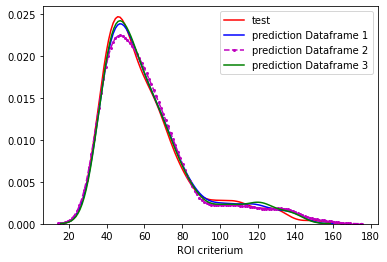

In [77]:
# Visualize the predictions against the actual values 
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot = sns.distplot(y1_pred_ranfor_reg, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_ranfor_reg, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',
                         label='prediction Dataframe 2',
                         ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_ranfor_reg, hist=False, color='g',label='prediction Dataframe 3', ax=ax_test)

**Adaboost**

In [78]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid_ada = {"learning_rate"   : [0.01, 0.1, 0.3],
                  "loss"            : ['linear', 'square', 'exponential']
                 }
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate a RandomizedSearchCV on an AdaBoostRegressor model with 100 iterations
ada_reg_grid_1 = RandomizedSearchCV(AdaBoostRegressor(DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf = 2, max_depth = 10), n_estimators=10), param_distributions = param_grid_ada, n_iter = 100, verbose = 2, n_jobs = -1, cv=6)
ada_reg_grid_2 = RandomizedSearchCV(AdaBoostRegressor(DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf = 2, max_depth = 10), n_estimators=10), param_distributions = param_grid_ada, n_iter = 100, verbose = 2, n_jobs = -1, cv=6)
ada_reg_grid_3 = RandomizedSearchCV(AdaBoostRegressor(DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf = 2, max_depth = 10), n_estimators=10), param_distributions = param_grid_ada, n_iter = 100, verbose = 2, n_jobs = -1, cv=6)

ada_reg_grid_1.fit(X1_train, y1_train)
ada_reg_grid_2.fit(X2_train, y2_train)
ada_reg_grid_3.fit(X3_train, y3_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 9 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.8s finished
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 9 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.7s finished
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 9 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    2.0s finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                    criterion='mse',
                                                                                    max_depth=10,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=2,
                                                                                    min_samples_split=5,
                       

In [79]:
print(ada_reg_grid_1.best_params_)
print(ada_reg_grid_2.best_params_)
print(ada_reg_grid_3.best_params_)

ada_reg_1 = AdaBoostRegressor(DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf = 2, max_depth = 10),
                              n_estimators=10,
                              loss= ada_reg_grid_1.best_params_['loss'],
                              learning_rate= ada_reg_grid_1.best_params_['learning_rate'])

ada_reg_2 = AdaBoostRegressor(DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf = 2, max_depth = 10),
                              n_estimators=10,
                              loss= ada_reg_grid_2.best_params_['loss'],
                              learning_rate= ada_reg_grid_2.best_params_['learning_rate'])

ada_reg_3 = AdaBoostRegressor(DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf = 2, max_depth = 10),
                              n_estimators=10,
                              loss= ada_reg_grid_3.best_params_['loss'],
                              learning_rate= ada_reg_grid_3.best_params_['learning_rate'])

{'loss': 'square', 'learning_rate': 0.3}
{'loss': 'linear', 'learning_rate': 0.1}
{'loss': 'exponential', 'learning_rate': 0.3}


In [105]:
start_ada_reg_1 = timeit.default_timer()
ada_reg_1.fit(X1_train, y1_train)
time_ada_reg_1 = timeit.default_timer() - start_ada_reg_1

start_ada_reg_2 = timeit.default_timer()
ada_reg_2.fit(X2_train, y2_train)
time_ada_reg_2 = timeit.default_timer() - start_ada_reg_2

start_ada_reg_3 = timeit.default_timer()
ada_reg_3.fit(X3_train, y3_train)
time_ada_reg_3 = timeit.default_timer() - start_ada_reg_3

# Compute predictions from the test set
y1_pred_ada_reg = ada_reg_1.predict(X1_test)
y2_pred_ada_reg = ada_reg_2.predict(X2_test)
y3_pred_ada_reg = ada_reg_3.predict(X3_test)

df_ada_reg_1 = Reg_metrics('ada_reg_1',y1_test,y1_pred_ada_reg)
df_ada_reg_1['CPU_time(s)'] = time_ada_reg_1
df_m = df_m.append(df_ada_reg_1)

df_ada_reg_2 = Reg_metrics('ada_reg_2',y2_test,y2_pred_ada_reg)
df_ada_reg_2['CPU_time(s)'] = time_ada_reg_1
df_m = df_m.append(df_ada_reg_2)

df_ada_reg_3 = Reg_metrics('ada_reg_3',y3_test,y3_pred_ada_reg)
df_ada_reg_3['CPU_time(s)'] = time_ada_reg_3
df_m = df_m.append(df_ada_reg_3)

df_m.tail(3)

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,ada_reg_1,0.905540,7.089316,0.074367,0.099141
0,ada_reg_2,0.869718,8.325721,0.103138,0.099141
0,ada_reg_3,0.918663,6.578456,0.075730,0.092325


In [81]:
df_coef_ada_reg_1 = pd.DataFrame({'Features':arr_col_x1 , 'Ada_reg_coef Dataframe 1':ada_reg_1.feature_importances_})
df_coef_ada_reg_1.sort_values(by=['Ada_reg_coef Dataframe 1'], ascending=False).head(5)

,Features,Ada_reg_coef Dataframe 1
2,Energy_tot(kWh_Area),0.612134
0,Area2refArea,0.326362
1,SolarPanel(kWh)_Etot,0.048991
6,reg_E,0.002695
4,reg_B,0.002459


In [82]:
df_coef_ada_reg_2 = pd.DataFrame({'Features':arr_col_x2 , 'Ada_reg_coef Dataframe 2':ada_reg_2.feature_importances_})
df_coef_ada_reg_2.sort_values(by=['Ada_reg_coef Dataframe 2'], ascending=False).head(5)

,Features,Ada_reg_coef Dataframe 2
1,Energy_tot(kWh_Area),0.635559
0,Area2refArea,0.333087
12,ft_Office,0.005831
15,ft_Spa,0.004954
4,reg_C,0.004648


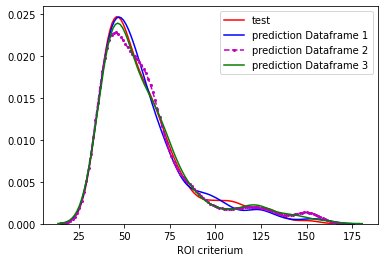

In [83]:
# Visualize the predictions against the actual values 
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot1 = sns.distplot(y1_pred_ada_reg, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_ada_reg, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',
                         label='prediction Dataframe 2',
                         ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_ada_reg, hist=False, color='g',label='prediction Dataframe 3', ax=ax_test)

**GradBoost**

In [84]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid_graboo = {"learning_rate"   : [0.01, 0.1, 0.3],
             "subsample"        : [0.5, 1.0],
             'max_depth'        : [5, 10],
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [5, 10],
             "min_samples_leaf" : [2, 6]
             }
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate a RandomizedSearchCV on a GradientBoostingRegressor model with 100 iterations
graboo_reg_grid_1 = RandomizedSearchCV(GradientBoostingRegressor(), 
                                       param_distributions = param_grid_graboo, n_iter = 100, verbose = 2, n_jobs = -1, cv=6)
graboo_reg_grid_2 = RandomizedSearchCV(GradientBoostingRegressor(), 
                                       param_distributions = param_grid_graboo, n_iter = 100, verbose = 2, n_jobs = -1, cv=6)
graboo_reg_grid_3 = RandomizedSearchCV(GradientBoostingRegressor(), 
                                       param_distributions = param_grid_graboo, n_iter = 100, verbose = 2, n_jobs = -1, cv=6)

graboo_reg_grid_1.fit(X1_train, y1_train)
graboo_reg_grid_2.fit(X2_train, y2_train)
graboo_reg_grid_3.fit(X3_train, y3_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 96 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   48.7s finished
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 96 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   44.9s finished
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 96 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   51.7s finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [85]:
print(graboo_reg_grid_1.best_params_)
print(graboo_reg_grid_2.best_params_)
print(graboo_reg_grid_3.best_params_)
graboo_reg_1 = GradientBoostingRegressor(subsample=graboo_reg_grid_1.best_params_['subsample'],
                                         min_samples_split=graboo_reg_grid_1.best_params_['min_samples_split'],
                                         min_samples_leaf=graboo_reg_grid_1.best_params_['min_samples_leaf'],
                                         max_features=graboo_reg_grid_1.best_params_['max_features'],
                                         max_depth=graboo_reg_grid_1.best_params_['max_depth'],
                                         learning_rate=graboo_reg_grid_1.best_params_['learning_rate'])

graboo_reg_2 = GradientBoostingRegressor(subsample=graboo_reg_grid_2.best_params_['subsample'],
                                         min_samples_split=graboo_reg_grid_2.best_params_['min_samples_split'],
                                         min_samples_leaf=graboo_reg_grid_2.best_params_['min_samples_leaf'],
                                         max_features=graboo_reg_grid_2.best_params_['max_features'],
                                         max_depth=graboo_reg_grid_2.best_params_['max_depth'],
                                         learning_rate=graboo_reg_grid_2.best_params_['learning_rate'])

graboo_reg_3 = GradientBoostingRegressor(subsample=graboo_reg_grid_3.best_params_['subsample'],
                                         min_samples_split=graboo_reg_grid_3.best_params_['min_samples_split'],
                                         min_samples_leaf=graboo_reg_grid_3.best_params_['min_samples_leaf'],
                                         max_features=graboo_reg_grid_3.best_params_['max_features'],
                                         max_depth=graboo_reg_grid_3.best_params_['max_depth'],
                                         learning_rate=graboo_reg_grid_3.best_params_['learning_rate'])

{'subsample': 0.5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5, 'learning_rate': 0.1}
{'subsample': 0.5, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 5, 'learning_rate': 0.1}
{'subsample': 0.5, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.1}


In [106]:
start_graboo_reg_1 = timeit.default_timer()
graboo_reg_1.fit(X1_train, y1_train)
time_graboo_reg_1 = timeit.default_timer() - start_graboo_reg_1

start_graboo_reg_2 = timeit.default_timer()
graboo_reg_2.fit(X2_train, y2_train)
time_graboo_reg_2 = timeit.default_timer() - start_graboo_reg_2

start_graboo_reg_3 = timeit.default_timer()
graboo_reg_3.fit(X3_train, y3_train)
time_graboo_reg_3 = timeit.default_timer() - start_graboo_reg_3

# Compute predictions from the test set
y1_pred_graboo_reg = graboo_reg_1.predict(X1_test)
y2_pred_graboo_reg = graboo_reg_2.predict(X2_test)
y3_pred_graboo_reg = graboo_reg_3.predict(X3_test)

df_graboo_reg_1 = Reg_metrics('gradb_reg_1',y1_test,abs(y1_pred_graboo_reg))
df_graboo_reg_1['CPU_time(s)'] = time_graboo_reg_1
df_m = df_m.append(df_graboo_reg_1)

df_graboo_reg_2 = Reg_metrics('gradb_reg_2',y2_test,abs(y2_pred_graboo_reg))
df_graboo_reg_2['CPU_time(s)'] = time_graboo_reg_2
df_m = df_m.append(df_graboo_reg_2)

df_graboo_reg_3 = Reg_metrics('gradb_reg_3',y3_test,abs(y3_pred_graboo_reg))
df_graboo_reg_3['CPU_time(s)'] = time_graboo_reg_3
df_m = df_m.append(df_graboo_reg_3)

df_m.tail(3)

,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,gradb_reg_1,0.982791,3.025916,0.039222,0.291296
0,gradb_reg_2,0.873555,8.202208,0.095964,0.270050
0,gradb_reg_3,0.969652,4.018322,0.046893,0.395991


In [87]:
df_coef_graboo_reg_1 = pd.DataFrame({'Features':arr_col_x1 , 'GradB_reg_coef Dataframe 1':graboo_reg_1.feature_importances_})
df_coef_graboo_reg_1.sort_values(by=['GradB_reg_coef Dataframe 1'], ascending=False).head()

,Features,GradB_reg_coef Dataframe 1
2,Energy_tot(kWh_Area),0.564318
0,Area2refArea,0.351141
1,SolarPanel(kWh)_Etot,0.072709
17,ft_Store,0.002743
5,reg_C,0.002468


In [88]:
df_coef_graboo_reg_2 = pd.DataFrame({'Features':arr_col_x2 , 'GradB_reg_coef Dataframe 2':graboo_reg_2.feature_importances_})
df_coef_graboo_reg_2.sort_values(by=['GradB_reg_coef Dataframe 2'], ascending=False).head()

,Features,GradB_reg_coef Dataframe 2
1,Energy_tot(kWh_Area),0.609479
0,Area2refArea,0.366138
12,ft_Office,0.006336
10,ft_Beach,0.003206
3,reg_B,0.003136


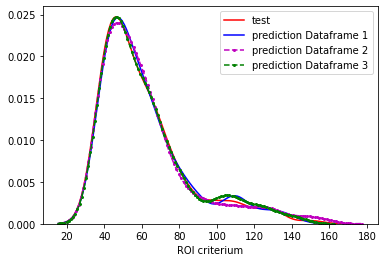

In [89]:
# Visualize the predictions against the actual values
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot1 = sns.distplot(y1_pred_graboo_reg, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_graboo_reg, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',
                         label='prediction Dataframe 2',
                         ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_graboo_reg, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='g',
                         label='prediction Dataframe 3',
                         ax=ax_test)

**XGBoost**

In [90]:
import xgboost as xgb
from xgboost import XGBRegressor
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid_xgboo = {"learning_rate"   : [0.01, 0.1, 0.3] ,
             'max_depth'        : [5, 10],
             "min_child_weight" : [1, 5],
             "gamma"            : [0.0, 0.2, 0.4],
             "colsample_bytree" : [0.3, 0.5, 0.7]
             }
# Instantiate a RandomizedSearchCV on an XGBRegressor model with 100 iterations
xgboo_reg_grid_1 = RandomizedSearchCV(XGBRegressor(), 
                                      param_distributions = param_grid_xgboo, n_iter = 100, verbose = 2, n_jobs = -1, cv=6)
xgboo_reg_grid_2 = RandomizedSearchCV(XGBRegressor(), 
                                      param_distributions = param_grid_xgboo, n_iter = 100, verbose = 2, n_jobs = -1, cv=6)
xgboo_reg_grid_3 = RandomizedSearchCV(XGBRegressor(), 
                                      param_distributions = param_grid_xgboo, n_iter = 100, verbose = 2, n_jobs = -1, cv=6)

xgboo_reg_grid_1.fit(X1_train, y1_train)
xgboo_reg_grid_2.fit(X2_train, y2_train)
xgboo_reg_grid_3.fit(X3_train, y3_train)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   40.3s finished
C:\Users\USER\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   35.6s finished


[16:34:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   45.5s finished


[16:35:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [91]:
print(xgboo_reg_grid_1.best_params_)
print(xgboo_reg_grid_2.best_params_)
print(xgboo_reg_grid_3.best_params_)

xgboo_reg_1 = XGBRegressor(min_child_weight=xgboo_reg_grid_1.best_params_['min_child_weight'],
                           max_depth=xgboo_reg_grid_1.best_params_['max_depth'],
                           learning_rate=xgboo_reg_grid_1.best_params_['learning_rate'],
                           gamma=xgboo_reg_grid_1.best_params_['gamma'],
                           colsample_bytree=xgboo_reg_grid_1.best_params_['colsample_bytree'])

xgboo_reg_2 = XGBRegressor(min_child_weight=xgboo_reg_grid_2.best_params_['min_child_weight'],
                           max_depth=xgboo_reg_grid_2.best_params_['max_depth'],
                           learning_rate=xgboo_reg_grid_2.best_params_['learning_rate'],
                           gamma=xgboo_reg_grid_2.best_params_['gamma'],
                           colsample_bytree=xgboo_reg_grid_2.best_params_['colsample_bytree'])

xgboo_reg_3 = XGBRegressor(min_child_weight=xgboo_reg_grid_3.best_params_['min_child_weight'],
                           max_depth=xgboo_reg_grid_3.best_params_['max_depth'],
                           learning_rate=xgboo_reg_grid_3.best_params_['learning_rate'],
                           gamma=xgboo_reg_grid_3.best_params_['gamma'],
                           colsample_bytree=xgboo_reg_grid_3.best_params_['colsample_bytree'])

{'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.7}
{'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}
{'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}


In [107]:
start_xgboo_reg_1 = timeit.default_timer()
xgboo_reg_1.fit(X1_train, y1_train)
time_xgboo_reg_1 = timeit.default_timer() - start_xgboo_reg_1

start_xgboo_reg_2 = timeit.default_timer()
xgboo_reg_2.fit(X2_train, y2_train)
time_xgboo_reg_2 = timeit.default_timer() - start_xgboo_reg_2

start_xgboo_reg_3 = timeit.default_timer()
xgboo_reg_3.fit(X3_train, y3_train)
time_xgboo_reg_3 = timeit.default_timer() - start_xgboo_reg_3


# Compute predictions from the test set
y1_pred_xgboo_reg = abs(xgboo_reg_1.predict(X1_test))
y2_pred_xgboo_reg = abs(xgboo_reg_2.predict(X2_test))
y3_pred_xgboo_reg = abs(xgboo_reg_3.predict(X3_test))

df_xgboo_reg_1 = Reg_metrics('xgboo_reg_1',y1_test,y1_pred_xgboo_reg)
df_xgboo_reg_1['CPU_time(s)'] = time_xgboo_reg_1
df_m = df_m.append(df_xgboo_reg_1)

df_xgboo_reg_2 = Reg_metrics('xgboo_reg_2',y2_test,y2_pred_xgboo_reg)
df_xgboo_reg_2['CPU_time(s)'] = time_xgboo_reg_2
df_m = df_m.append(df_xgboo_reg_2)

df_xgboo_reg_3 = Reg_metrics('xgboo_reg_3',y3_test,y3_pred_xgboo_reg)
df_xgboo_reg_3['CPU_time(s)'] = time_xgboo_reg_3
df_m = df_m.append(df_xgboo_reg_3)

df_m.tail(3)

C:\Users\USER\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,xgboo_reg_1,0.955783,4.850383,0.060675,0.256050
0,xgboo_reg_2,0.896465,7.422031,0.097051,0.220088
0,xgboo_reg_3,0.956478,4.812101,0.059473,0.270892


In [93]:
df_coef_xgboo_reg_1 = (pd.DataFrame({'Features':np.array(list(xgboo_reg_1.get_booster().get_score(importance_type='weight').keys())),
                                   'XGBoo_reg_coef Dataframe 1':np.array(list(xgboo_reg_1.get_booster().get_score(importance_type='weight').values()))}))
df_coef_xgboo_reg_1.sort_values(by=['XGBoo_reg_coef Dataframe 1'], ascending=False).head()

,Features,XGBoo_reg_coef Dataframe 1
1,Area2refArea,458
0,Energy_tot(kWh_Area),451
2,SolarPanel(kWh)_Etot,370
3,ft_Office,33
14,ft_Beach,32


In [94]:
df_coef_xgboo_reg_2 = (pd.DataFrame({'Features':np.array(list(xgboo_reg_2.get_booster().get_score(importance_type='weight').keys())),
                                      'XGBoo_reg_coef Dataframe 2':np.array(list(xgboo_reg_2.get_booster().get_score(importance_type='weight').values()))}))
df_coef_xgboo_reg_2.sort_values(by=['XGBoo_reg_coef Dataframe 2'], ascending=False).head()

,Features,XGBoo_reg_coef Dataframe 2
0,Energy_tot(kWh_Area),592
1,Area2refArea,526
11,reg_B,54
9,ft_Beach,53
7,reg_F,49


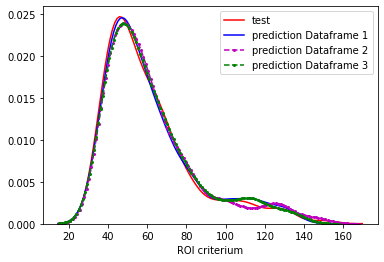

In [95]:
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot1 = sns.distplot(y1_pred_xgboo_reg, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)
sns_plot2 = sns.distplot(y2_pred_xgboo_reg, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='m',
                         label='prediction Dataframe 2',
                         ax=ax_test)
sns_plot3 = sns.distplot(y3_pred_xgboo_reg, hist=False, 
                         kde_kws={'linestyle':'dashed','marker':'o','markersize':'2'}, 
                         color='g',
                         label='prediction Dataframe 3',
                         ax=ax_test)

In [108]:
print('Number of studied cases:', df_m.shape[0])
df_m.sort_values(by=['CPU_time(s)'], ascending=True)

Number of studied cases: 33


,Regression,R2_score,RMSE,RMSLE,CPU_time(s)
0,lin_reg_1,0.707107,12.483451,0.166490,0.005301
0,lin_reg_2,0.670481,13.240977,0.180048,0.005344
0,lin_reg_3,0.705343,12.520981,0.171142,0.005572
0,tree_reg_2,0.850261,8.925811,0.110152,0.008059
0,rig_reg_3,0.701998,12.591843,0.171457,0.008496
0,tree_reg_1,0.839256,9.247978,0.103206,0.008530
0,tree_reg_3,0.853859,8.817926,0.100313,0.008748
0,knn_reg_1,0.291641,19.413632,0.264339,0.009653
0,rig_reg_2,0.669176,13.267175,0.180861,0.009795
0,knn_reg_3,0.247402,20.010661,0.275754,0.010017


**Adaboost is selected with dataframe 1 where the main features of decisions are the energy at stake, the area for the energy devic, energy produced by solar panel and the regions. The accuracy is above 90% for computational time below 0.1 seconds. Future work: perform this study with similar dataframes but only based on one feature containing categorical values: Region or FacilityType.**

**Now let's use neuronal networks with torch. We only look at the results  for the first dataframe. The hyperpamaters are not only the learning rate but also the size of the neuronal network.**

In [147]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [148]:
class DataforReg:
    def __init__(self, X_dat, y_dat):
        self.X_dat = X_dat
        self.y_dat = y_dat
        
    def __getitem__(self, ind):
        return self.X_dat[ind], self.y_dat[ind]
    
    def __len__ (self):
        return len(self.X_dat)
    
X1a_train, y1a_train = np.array(X1_train), np.array(y1_train)
X1a_test, y1a_test = np.array(X1_test), np.array(y1_test)
y1a_train, y1a_test  = y1a_train.astype(float), y1a_test.astype(float)
 
# preparing the numpy array for pytorch
ds_train = DataforReg(torch.from_numpy(X1a_train).float(), torch.from_numpy(y1a_train).float())
ds_test = DataforReg(torch.from_numpy(X1a_test).float(), torch.from_numpy(y1a_test).float())

**Setting the epochs, batch size, learning rate and the number of features for the neuronal network**

In [198]:
EPOCHS = 50
BATCH_SIZE = 64
NUM_FEATURES = len(X1_train.columns)
NUM_FEATURES

18

**Loading data before training and testing**

In [194]:
dl_train = DataLoader(dataset=ds_train, batch_size=BATCH_SIZE, shuffle=True)
dl_test = DataLoader(dataset=ds_test, batch_size=1)

**Creating a class of expendable neuronal networks**

In [195]:
class NeuNet(nn.Module):
    def __init__(self, dIn, dOut, nb_layers):
        super(NeuNet, self).__init__()
        self.layers = nn.ModuleList()
        tnl = round(nb_layers/2)
        fnb_i = dIn
        fnb_j = 2*dIn
        for itop in range(tnl):
            self.layers.append(nn.Linear(fnb_i,fnb_j))
            fnb_i *= 2
            fnb_j *= 2
        for ibot in range(tnl,nb_layers-1):
            fnb_i /= 2
            fnb_j /= 2
            self.layers.append(nn.Linear(int(fnb_j),int(fnb_i)))
        self.layers.append(nn.Linear(int(fnb_i),dOut))
        self.relu = nn.ReLU()
        
    def forward(self, x):
        y = x
        for i in range(len(self.layers)-1):
            y = self.relu(self.layers[i](y))
        y = self.layers[len(self.layers)-1](y)             
        return y
    
    def predict(self, x):
        y = x
        for i in range(len(self.layers)-1):
            y = self.relu(self.layers[i](y))
        y = self.layers[len(self.layers)-1](y) 
        return y

**The total number of models and optimizers are defined**

In [203]:
# setting the device for torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# loss criterium
lcrit = nn.MSELoss()

TOT_NB_LAYERS = [6, 8, 10]
LEARNING_RATE = [0.001, 0.005, 0.01]
params = []
for ilay in TOT_NB_LAYERS:
    for li in LEARNING_RATE:
        modeli = NeuNet(dIn=NUM_FEATURES, dOut=1, nb_layers=ilay)
        modeli.to(device)
        optimizeri = optim.Adam(modeli.parameters(), lr=li)
        # tuple Parameter Model Optimizer Identation
        pmoi = (modeli, optimizeri)
        params.append(pmoi)
# combinaison of models and optimizers
params

[(NeuNet(
    (layers): ModuleList(
      (0): Linear(in_features=18, out_features=36, bias=True)
      (1): Linear(in_features=36, out_features=72, bias=True)
      (2): Linear(in_features=72, out_features=144, bias=True)
      (3): Linear(in_features=144, out_features=72, bias=True)
      (4): Linear(in_features=72, out_features=36, bias=True)
      (5): Linear(in_features=36, out_features=1, bias=True)
    )
    (relu): ReLU()
  ),
  Adam (
  Parameter Group 0
      amsgrad: False
      betas: (0.9, 0.999)
      eps: 1e-08
      lr: 0.001
      weight_decay: 0
  )),
 (NeuNet(
    (layers): ModuleList(
      (0): Linear(in_features=18, out_features=36, bias=True)
      (1): Linear(in_features=36, out_features=72, bias=True)
      (2): Linear(in_features=72, out_features=144, bias=True)
      (3): Linear(in_features=144, out_features=72, bias=True)
      (4): Linear(in_features=72, out_features=36, bias=True)
      (5): Linear(in_features=36, out_features=1, bias=True)
    )
    (relu

**Here the selection of the  model is performed based on the model of neuronal network and the learning rate. If for a specific model, the learning rates selected can't reached the convergence criterium 'conv_crit', a new  model is neuronal network selected with more layers and more neurones. When the convergence criterium is reached, the for loop stops, avoiding the training of deeper neuronal networks**

In [204]:
from itertools import product
from tqdm.notebook import tqdm
# only printing losses for a specific number of epochs
epoch_print = 10
# convergence criterium defined as the mininum tolerated value for the MSE for Test Loss 
conv_crit = 70.0
loss_stats_llist = []
y_pred_llist = []

#  loop on all the combination of  models and learning rates
for mi, opti in params:
#for mi, opti in product(*params):
    
    loss_stats = {'train': [],"test": []}
    y_pred_list = []
    
    for ep in tqdm(range(1, EPOCHS+1)):
        # training
        train_epoch_loss = 0
        mi.train()
        # computation for each batch (_bat)
        for X_train_bat, y_train_bat in dl_train:
            # preparing data to device selected for our model
            X_train_bat, y_train_bat = X_train_bat.to(device), y_train_bat.to(device)
            # resetting the optimizer gradiant to zero for each loop
            opti.zero_grad()
            # training the model on the batch
            y_train_pred = mi(X_train_bat)
            # applying the loss criterium
            train_loss = lcrit(y_train_pred, y_train_bat.unsqueeze(1))
            # compute loss gradient 
            train_loss.backward()
            # update the model based the learning rate and the loss gradient
            opti.step()
            train_epoch_loss += train_loss.item()
        #testing, no  need to store gradients while testing    
        with torch.no_grad():
            test_epoch_loss = 0
            mi.eval()
            for X_test_bat, y_test_bat in dl_test:
                X_test_bat, y_test_bat = X_test_bat.to(device), y_test_bat.to(device)
                y_test_pred = mi(X_test_bat)
                # store y_test_pred as a numpy list
                y_pred_list.append(y_test_pred.cpu().numpy())
                # using unsqueeze to match dimenstions
                test_loss = lcrit(y_test_pred, y_test_bat.unsqueeze(1))
                test_epoch_loss +=test_loss.item()
            loss_stats_tr = train_epoch_loss/len(dl_train)
            loss_stats_test = test_epoch_loss/len(dl_test)
            loss_stats['train'].append(loss_stats_tr)
            loss_stats['test'].append(loss_stats_test)
            # only printing losses for a specific number of epochs
            if ep % epoch_print == 0:
                print(f'Epoch {ep+0:03}/{EPOCHS}: | Train Loss: {loss_stats_tr:.3f} | Test Loss: {loss_stats_test:.3f}')
                
        y_pred_llist.append(y_pred_list)
    loss_stats_llist.append(loss_stats)
    # convergence criterium defined as the Test Loss of last Epoch 
    conva =  loss_stats['test'][-1]
    if (conva < conv_crit):
        # storing the best model, optimizer and prediction
        y_pred_last_list = [fsl.squeeze().tolist() for fsl in y_pred_llist[-1]]
        model_nn_opt = mi
        optimizer_opt = opti
        print(f'Test Loss Ratio last Epoch : {conva:.3f} | Mininum required value for MSE as convergence criterium {conv_crit:.3f}')
        break

Epoch 010/50: | Train Loss: 695.237 | Test Loss: 444.377
Epoch 020/50: | Train Loss: 338.928 | Test Loss: 264.792
Epoch 030/50: | Train Loss: 225.513 | Test Loss: 218.326
Epoch 040/50: | Train Loss: 210.319 | Test Loss: 183.805
Epoch 050/50: | Train Loss: 196.344 | Test Loss: 182.233



Epoch 010/50: | Train Loss: 264.034 | Test Loss: 214.254
Epoch 020/50: | Train Loss: 216.279 | Test Loss: 187.935
Epoch 030/50: | Train Loss: 187.350 | Test Loss: 252.212
Epoch 040/50: | Train Loss: 246.685 | Test Loss: 201.442
Epoch 050/50: | Train Loss: 139.620 | Test Loss: 170.205



Epoch 010/50: | Train Loss: 232.986 | Test Loss: 282.238
Epoch 020/50: | Train Loss: 201.042 | Test Loss: 230.267
Epoch 030/50: | Train Loss: 171.622 | Test Loss: 159.651
Epoch 040/50: | Train Loss: 99.613 | Test Loss: 143.029
Epoch 050/50: | Train Loss: 54.542 | Test Loss: 112.407



Epoch 010/50: | Train Loss: 619.706 | Test Loss: 418.244
Epoch 020/50: | Train Loss: 315.232 | Test Loss: 292.760
Epoch 030/50: | Train Loss: 225.157 | Test Loss: 217.704
Epoch 040/50: | Train Loss: 185.222 | Test Loss: 211.194
Epoch 050/50: | Train Loss: 157.282 | Test Loss: 186.425



Epoch 010/50: | Train Loss: 264.963 | Test Loss: 223.407
Epoch 020/50: | Train Loss: 206.225 | Test Loss: 225.832
Epoch 030/50: | Train Loss: 200.442 | Test Loss: 308.949
Epoch 040/50: | Train Loss: 206.564 | Test Loss: 180.043
Epoch 050/50: | Train Loss: 137.419 | Test Loss: 162.380



Epoch 010/50: | Train Loss: 274.818 | Test Loss: 203.702
Epoch 020/50: | Train Loss: 234.977 | Test Loss: 222.294
Epoch 030/50: | Train Loss: 84.579 | Test Loss: 95.948
Epoch 040/50: | Train Loss: 113.842 | Test Loss: 137.078
Epoch 050/50: | Train Loss: 31.450 | Test Loss: 36.980

Test Loss Ratio last Epoch : 36.980 | Mininum required value for MSE as convergence criterium 70.000


**Showing the model and optimizer selected**

In [205]:
model_nn_opt, optimizer_opt

(NeuNet(
   (layers): ModuleList(
     (0): Linear(in_features=18, out_features=36, bias=True)
     (1): Linear(in_features=36, out_features=72, bias=True)
     (2): Linear(in_features=72, out_features=144, bias=True)
     (3): Linear(in_features=144, out_features=288, bias=True)
     (4): Linear(in_features=288, out_features=144, bias=True)
     (5): Linear(in_features=144, out_features=72, bias=True)
     (6): Linear(in_features=72, out_features=36, bias=True)
     (7): Linear(in_features=36, out_features=1, bias=True)
   )
   (relu): ReLU()
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.01
     weight_decay: 0
 ))

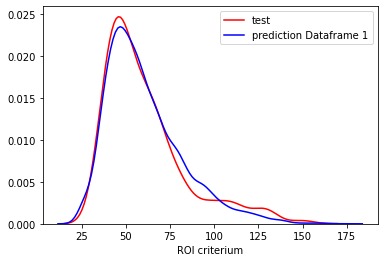

In [206]:
# Visualize the predictions against the actual values 
ax_test = sns.distplot(y1_test, hist=False, color='r', label='test')
sns_plot1 = sns.distplot(y_pred_last_list, hist=False, color='b',label='prediction Dataframe 1', ax=ax_test)

**Future work on neuronal network: perform this study of all dataframes for the more strict convergence criteria and implement a Bayesian  Optimization**